In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("C:/data sets/data_for_predictions.csv")


data.head()


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward fill
data.ffill(inplace=True)

# Encode categorical variables if necessary
data = pd.get_dummies(data)

# Define features and target variable
X = data.drop('churn', axis=1)  # Replace 'churn' with the actual target column name
y = data['churn']  # Ensure this is the correct target variable


Unnamed: 0                             0
cons_12m                               0
cons_gas_12m                           0
cons_last_month                        0
forecast_cons_12m                      0
                                      ..
id_ffebf6a979dd0b17a41076df1057e733    0
id_fffac626da707b1b5ab11e8431a4d0a2    0
id_fffc0cacd305dd51f316424bbb08d1bd    0
id_fffe4f5646aa39c7f97f95ae2679ce64    0
id_ffff7fa066f1fb305ae285bb03bf325a    0
Length: 14669, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Make predictions
y_pred = rf_model.predict(X_test)


Accuracy: 0.9058863791923341
Confusion Matrix:
 [[2637    1]
 [ 274   10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.91      0.04      0.07       284

    accuracy                           0.91      2922
   macro avg       0.91      0.52      0.51      2922
weighted avg       0.91      0.91      0.86      2922



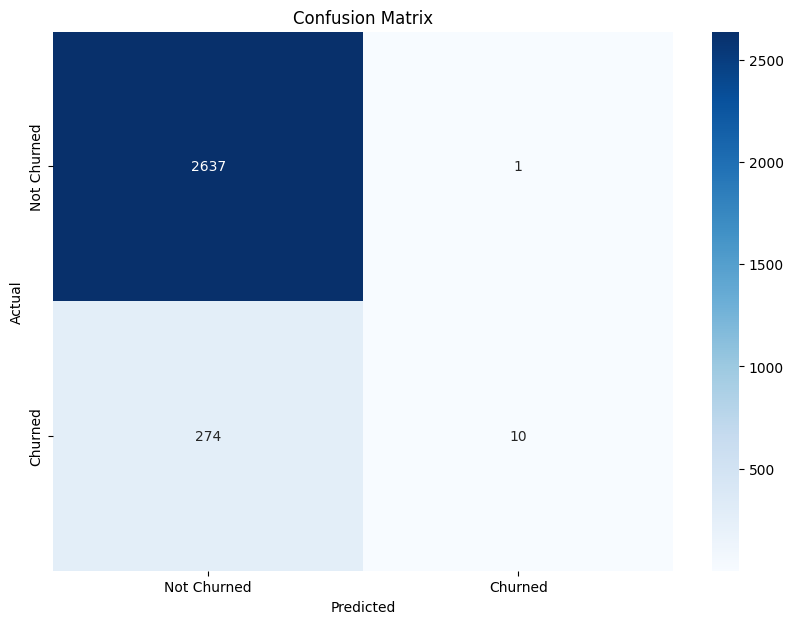

In [7]:

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

plt.figure(figsize=(10,7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
